<font color="green">Linear regression</font>

training input shape  {(500, 1)}
training output shape  {(500, 1)}
testing input shape  {(199, 1)}
testing input shape  {(199, 1)}
loss=1123.0957742890312,iterations =1


<Figure size 432x288 with 0 Axes>

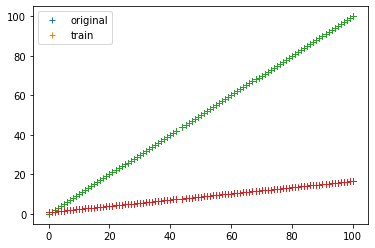

loss=509.60174971663224,iterations =2


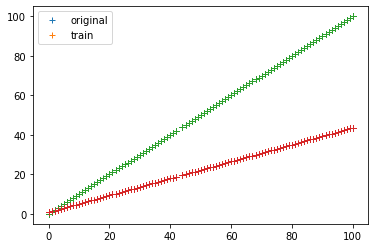

loss=231.25882861982703,iterations =3


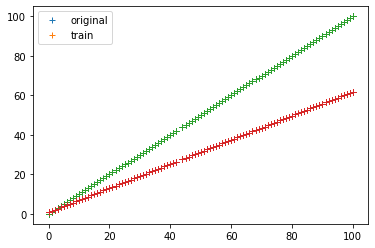

loss=104.97433439720568,iterations =4


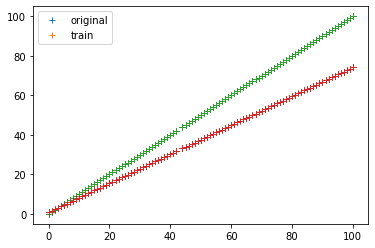

loss=47.67891687371389,iterations =5


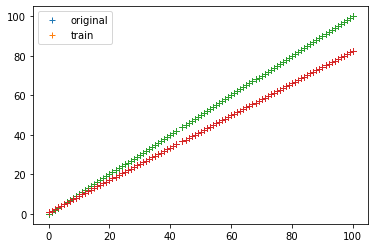

loss=21.68391986389371,iterations =6


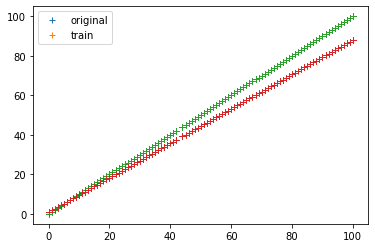

loss=9.889958310893963,iterations =7


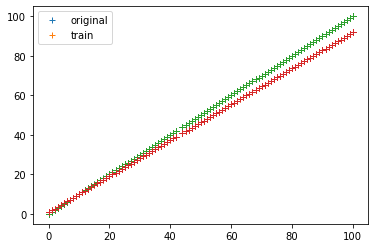

loss=4.5390222744375555,iterations =8


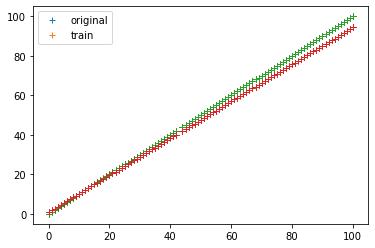

loss=2.111294051529295,iterations =9


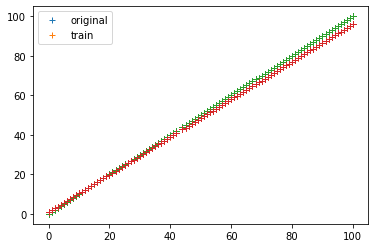

loss=1.0098284516250624,iterations =10


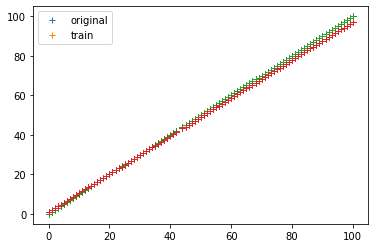

loss=0.5100896729326753,iterations =11


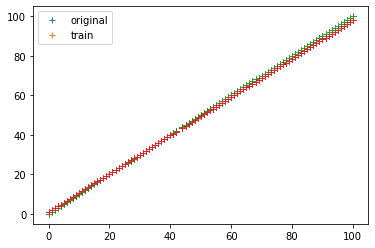

loss=0.283355019653305,iterations =12


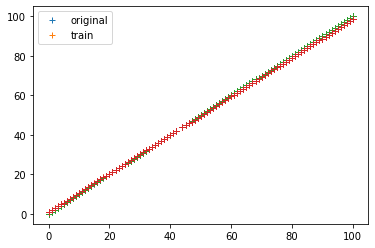

loss=0.18048264059621072,iterations =13


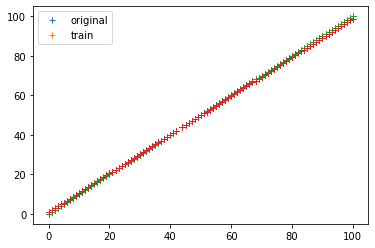

loss=0.13380671268049119,iterations =14


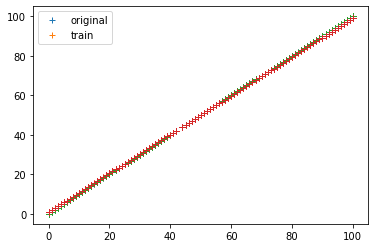

loss=0.11262717702487177,iterations =15


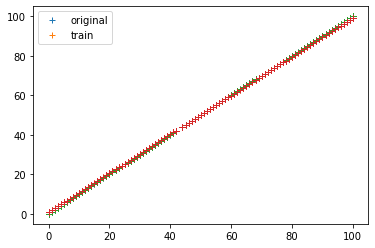

loss=0.10301538291026212,iterations =16


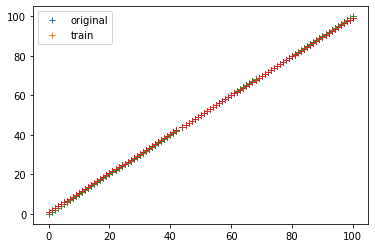

loss=0.09865188607746098,iterations =17


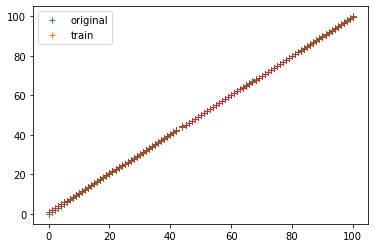

loss=0.0966695476663821,iterations =18


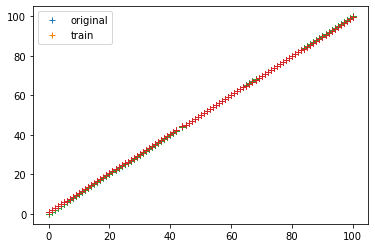

loss=0.09576754360043595,iterations =19


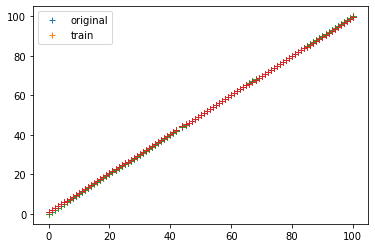

loss=0.09535568855522496,iterations =20


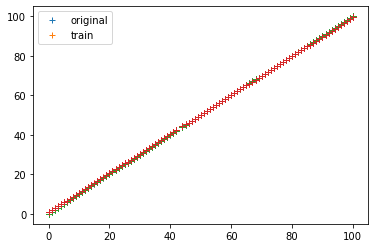

In [2]:
#training input and output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
data=pd.read_csv("data_for_lr.csv")
data=data.dropna()
trainin=np.array(data.x[0:500]).reshape(500,1)
trainout=np.array(data.x[0:500]).reshape(500,1)
#test
testin=np.array(data.x[500:700]).reshape(199,1)
testout=np.array(data.x[500:700]).reshape(199,1)
print("training input shape ",{trainin.shape})
print("training output shape ",{trainout.shape})
print("testing input shape ",{testin.shape})
print("testing input shape ",{testout.shape})
def forward_propogation(trainin,parameters):
    m=parameters["m"]
    c=parameters["c"]
    predictions =np.multiply(m,trainin)+c
    return predictions
def cost_function(predictions,trainout):
    cost= np.mean((trainout-predictions)**2)*0.5
    return cost
def backward_propogation(trainin,trainout,predictions):
    
    derivatives=dict()
    df=(predictions-trainout)
    dm=np.mean(np.multiply(df,trainin))
    dc=np.mean(df)
     
    derivatives["dm"]=dm
    derivatives["dc"]=dc
    return derivatives

def update(parameters,derivatives,learning_rate):
    parameters["m"]=parameters["m"]-learning_rate*derivatives['dm']
    parameters["c"]=parameters["c"]-learning_rate*derivatives['dc']
    
    return parameters
def train(trainin,trainout,iterations,learning_rate):
    plt.figure()
    loss=list()
    parameters=dict()
    parameters["m"]=np.random.uniform(0,1)
    parameters["c"]=np.random.uniform(0,1)
    
    for i in range(iterations):
        #forward
        predictions=forward_propogation(trainin,parameters)
        
        #cost
        cost=cost_function(predictions,trainout)
        loss.append(cost)
        print(f"loss={cost},iterations ={i+1}" )
        fig,ax=plt.subplots()
        ax.plot(trainin,trainout,"+",label="original")
        ax.plot(trainin,predictions,"+",label="train")
        
        legend=ax.legend()
        plt.plot(trainin,trainout,"+",label="original")
        plt.plot(trainin,predictions,"+",label="train")
        plt.show()
        
        #back propogation
        derivatives=backward_propogation(trainin,trainout,predictions)
        

        #update parameters
        parameters=update(parameters,derivatives,learning_rate)
        
    return parameters,loss

parameters,loss=train(trainin,trainout,20,0.0001)

prediction

In [25]:
loss

[118.53792090999393,
 53.84108383012864,
 24.488054148709647,
 11.1705490323765,
 5.12837917298368,
 2.387036978278883,
 1.1432839513287645,
 0.5789887887333951,
 0.32296441194427794,
 0.20680283228184104,
 0.15409715874653301,
 0.130181500260417,
 0.11932790364406075,
 0.11440057911902589,
 0.1121620109589204,
 0.11114333469267368,
 0.11067812488277669,
 0.11046402357006577,
 0.11036385061355236,
 0.11031536723131913]

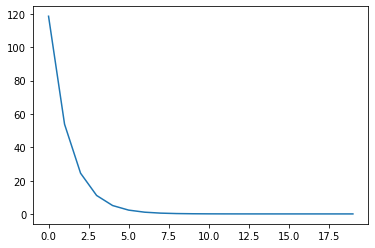

In [26]:
plt.plot(loss)

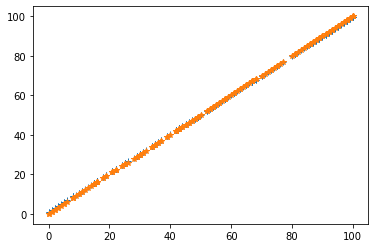

In [34]:
test=testin*parameters['m']+parameters['c']
plt.plot(testin,test,'+')
plt.plot(testin,testout,'*')
plt.show()


In [36]:
cost_function(testout,test)

0.10879424877023194